# Problem Statement
---



You are a consultant hired to analyse and present data to investors and home-builders who are looking to sell their construction projects to potential home-buyers.

The current model which stakeholders are using is the general statistical metrics of annual houses, in particular the mean sales price of houses. Data in this field is rather assymetric as access to readily available factors of housing prices are not readily available.

The objective of this model is to provide a more accurate prediction of a house's price based on the features of the house itself.

In this analysis, we will be using Supervised Learning with Regression models.

## Data Dictionary:

Please refer to this link for the data dictionary.
https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data

Data cleaning will be explained as we go along and we may set gradings to a integer rating
For string columns that are not easily rated, we may set dummy columns to them.

# Additional Research Sources:
--- 
https://nycdatascience.com/blog/r/ames-iowa-real-estate-analysis/  
https://www.cityofames.org/about-ames/about-ames  


# Import Libraries
---


In [1]:
#libraries 
import scipy.stats as stats
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Loading the Data  

We have the AMES housing price

In [2]:
#url of data for team colab, please remove this section for individual submission and replaced it with your git submission on data
train_url = '../project_2/datasets/train.csv'

#data
df_train = pd.read_csv(train_url) #Training data

# Data cleaning
---



## Initial Check

Get a sneak peek of the data we are dealing with first.

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Wow! There appears to be a lot of columns. This presents a problem that the columns are not be viewable. Let's using columns function to see what column names we have:

In [4]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Let's also check for any null values.

In [5]:
#check for null values in columns
inulls = df_train.isnull().sum() # Store all column Null Counts in inulls
a = inulls > 0 # Store all non-zero counts into variable a
inulls[a] #Display only columns present in a

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

Looks like we have quite a number of null datas to deal with.

Upon checking the data dictionary, it appears that the null values have meaning, and it indicates that the feature represented in the column is not present in the house being sold. Thus it is OK to set the null values to zeroes instead.

Now we check each columns to see what data types we are dealing with.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

There are a number of objects in the data indicating that there is a presence of strings in the data. We will need to either clean them up or set keywords.

### Standardize Column Names
--- 
Let's standardise column names to lower case and underscores

In [7]:
df_train.columns = df_train.columns.str.lower() #set all columns to lower case
df_train.columns = df_train.columns.str.replace(' ','_') #replace all space with underscore

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

The column names now contains only lower cases and underscores.

## Data Cleaning: Null Datas
---

Upon checking with the data dictionary, it appears that the null datas indicate that the features are not present in the house sold. Thus it is more prudent to simply replace these null values with zeroes.

In [9]:
df_train.fillna(0, inplace = True) #replace all null data with zeroes

Check if there are still anymore null datas:

In [10]:
df_train.isnull().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 81, dtype: int64

We have cleaned up the null data.

## Data Cleaning: Setup Number Ratings
--- 

From the data dictionary, we find that there are several ratings that are just number ratings set in the form of a string. Thus we are able to swap them out to an integer rating to help better our data analysis.

#### Set Functional column to a rating number:  
7 - Typ Typical Functionality  
6 - Min1 Minor Deductions 1  
5 - Min2 Minor Deductions 2  
4 - Mod Moderate Deductions  
3 - Maj1 Major Deductions 1  
2 - Maj2 Major Deductions 2  
1 - Sev Severely Damaged  
0 - Sal Salvage only  

In [11]:
df_train['functional'].replace('Typ',7, inplace = True)
df_train['functional'].replace('Min1',6, inplace = True)
df_train['functional'].replace('Min2',5, inplace = True)
df_train['functional'].replace('Mod',4, inplace = True)
df_train['functional'].replace('Maj1',3, inplace = True)
df_train['functional'].replace('Maj2',2, inplace = True)
df_train['functional'].replace('Sev',1, inplace = True)
df_train['functional'].replace('Sal',0, inplace = True)
df_train['functional'].head()

0    7
1    7
2    7
3    7
4    7
Name: functional, dtype: int64

#### Set garage_cond to a rating number:
5 - Ex Excellent  
4 - Gd Good  
3 - TA Average/Typical  
2 - Fa Fair  
1 - Po Poor  
0 - Na No Garage  

In [12]:
df_train['garage_cond'].replace('Ex',5, inplace = True)
df_train['garage_cond'].replace('Gd',4, inplace = True)
df_train['garage_cond'].replace('TA',3, inplace = True)
df_train['garage_cond'].replace('Fa',2, inplace = True)
df_train['garage_cond'].replace('Po',1, inplace = True)
df_train['garage_cond'].fillna(0, inplace = True)
df_train['garage_cond'].head()

0    3
1    3
2    3
3    3
4    3
Name: garage_cond, dtype: int64

#### CentralAir Data

From Data Dictionary, it is clear that CentralAir is a yes or no field. We can set Yes to 1 and No to 0:

In [13]:
df_train['central_air'].replace('Y',1, inplace = True)
df_train['central_air'].replace('N',0, inplace = True)
df_train['central_air'].head()

0    1
1    1
2    1
3    1
4    1
Name: central_air, dtype: int64

CentralAir is now cleaned up.

#### paved_drive column
Set paved_drive to an index as follows:  
2 - Y Paved  
1 - P Partial Pavement  
0 - N Dirt/Gravel  

In [14]:
df_train['paved_drive'].replace('Y',2, inplace = True)
df_train['paved_drive'].replace('P',1, inplace = True)
df_train['paved_drive'].replace('N',0, inplace = True)
df_train['paved_drive'].fillna(0, inplace = True)
df_train['paved_drive'].head()

0    2
1    2
2    2
3    2
4    0
Name: paved_drive, dtype: int64

#### Set pool_qc to a rating number:
4 - Ex Excellent  
3 - Gd Good  
2- TA Average/Typical  
1 - Fa Fair   
0 - Na No Pool 

In [15]:
df_train['pool_qc'].replace('Ex',4, inplace = True)
df_train['pool_qc'].replace('Gd',3, inplace = True)
df_train['pool_qc'].replace('TA',2, inplace = True)
df_train['pool_qc'].replace('Fa',1, inplace = True)
df_train['pool_qc'].fillna(0, inplace = True)
df_train['pool_qc'].head()

0    0
1    0
2    0
3    0
4    0
Name: pool_qc, dtype: int64

#### Set exter_qual to a rating number:
5 - Ex Excellent  
4 - Gd Good  
3 - TA Average/Typical  
2 - Fa Fair  
1 - Po Poor  

In [16]:
df_train['exter_qual'].replace('Ex',5, inplace = True)
df_train['exter_qual'].replace('Gd',4, inplace = True)
df_train['exter_qual'].replace('TA',3, inplace = True)
df_train['exter_qual'].replace('Fa',2, inplace = True)
df_train['exter_qual'].replace('Po',1, inplace = True)
df_train['exter_qual'].head()

0    4
1    4
2    3
3    3
4    3
Name: exter_qual, dtype: int64

#### Set exter_cond to a rating number:
5 - Ex Excellent  
4 - Gd Good  
3 - TA Average/Typical  
2 - Fa Fair  
1 - Po Poor

In [17]:
df_train['exter_cond'].replace('Ex',5, inplace = True)
df_train['exter_cond'].replace('Gd',4, inplace = True)
df_train['exter_cond'].replace('TA',3, inplace = True)
df_train['exter_cond'].replace('Fa',2, inplace = True)
df_train['exter_cond'].replace('Po',1, inplace = True)
df_train['exter_cond'].head()

0    3
1    3
2    4
3    3
4    3
Name: exter_cond, dtype: int64

#### Set bsmt_qual to a rating number:  
5 - Ex Excellent (100+ inches)  
4 - Gd Good (90-99 inches)  
3 - TA Typical (80-89 inches)  
2 - Fa Fair (70-79 inches)  
1 - Po Poor (<70 inches)  
0 - NA No Basement

In [18]:
df_train['bsmt_qual'].replace('Ex',5, inplace = True)
df_train['bsmt_qual'].replace('Gd',4, inplace = True)
df_train['bsmt_qual'].replace('TA',3, inplace = True)
df_train['bsmt_qual'].replace('Fa',2, inplace = True)
df_train['bsmt_qual'].replace('Po',1, inplace = True)
df_train['bsmt_qual'].fillna(0, inplace = True)
df_train['bsmt_qual'].head()

0    3
1    4
2    3
3    4
4    2
Name: bsmt_qual, dtype: int64

#### Set bsmt_cond to a rating number:  
5 - Ex Excellent  
4 - Gd Good  
3 - TA Typical - slight dampness allowed  
2 - Fa Fair - dampness or some cracking or settling  
1 - Po Poor - Severe cracking, settling, or wetness  
0 - NA No Basement

In [19]:
df_train['bsmt_cond'].replace('Ex',5, inplace = True)
df_train['bsmt_cond'].replace('Gd',4, inplace = True)
df_train['bsmt_cond'].replace('TA',3, inplace = True)
df_train['bsmt_cond'].replace('Fa',2, inplace = True)
df_train['bsmt_cond'].replace('Po',1, inplace = True)
df_train['bsmt_cond'].fillna(0, inplace = True)
df_train['bsmt_cond'].head()

0    3
1    3
2    3
3    3
4    4
Name: bsmt_cond, dtype: int64

#### Set bsmt_exposure to a rating number:  
4 - Gd Good Exposure  
3 - Av Average Exposure (split levels or foyers typically score average or above) 
2 - Mn Mimimum Exposure  
1 - No No Exposure  
0 - NA No Basement  

In [20]:
df_train['bsmt_exposure'].replace('Gd',4, inplace = True)
df_train['bsmt_exposure'].replace('Av',3, inplace = True)
df_train['bsmt_exposure'].replace('Mn',2, inplace = True)
df_train['bsmt_exposure'].replace('No',1, inplace = True)
df_train['bsmt_exposure'].fillna(0, inplace = True)
df_train['bsmt_exposure'].head()

0    1
1    1
2    1
3    1
4    1
Name: bsmt_exposure, dtype: int64

#### Set bsmtfin_type_1 to a rating number:  
6 - GLQ Good Living Quarters  
5 - ALQ Average Living Quarters  
4 - BLQ Below Average Living Quarters  
3 - Rec Average Rec Room  
2 - LwQ Low Quality  
1 - Unf Unfinshed  
0 - NA No Basement  

In [21]:
df_train['bsmtfin_type_1'].replace('GLQ',6, inplace = True)
df_train['bsmtfin_type_1'].replace('ALQ',5, inplace = True)
df_train['bsmtfin_type_1'].replace('BLQ',4, inplace = True)
df_train['bsmtfin_type_1'].replace('Rec',3, inplace = True)
df_train['bsmtfin_type_1'].replace('LwQ',2, inplace = True)
df_train['bsmtfin_type_1'].replace('Unf',1, inplace = True)
df_train['bsmtfin_type_1'].fillna(0, inplace = True)
df_train['bsmtfin_type_1'].head()

0    6
1    6
2    6
3    1
4    1
Name: bsmtfin_type_1, dtype: int64

#### Set bsmtfin_type_2 to a rating number:  
6 - GLQ Good Living Quarters  
5 - ALQ Average Living Quarters  
4 - BLQ Below Average Living Quarters  
3 - Rec Average Rec Room  
2 - LwQ Low Quality  
1 - Unf Unfinshed  
0 - NA No Basement  

In [22]:
df_train['bsmtfin_type_2'].replace('GLQ',6, inplace = True)
df_train['bsmtfin_type_2'].replace('ALQ',5, inplace = True)
df_train['bsmtfin_type_2'].replace('BLQ',4, inplace = True)
df_train['bsmtfin_type_2'].replace('Rec',3, inplace = True)
df_train['bsmtfin_type_2'].replace('LwQ',2, inplace = True)
df_train['bsmtfin_type_2'].replace('Unf',1, inplace = True)
df_train['bsmtfin_type_2'].fillna(0, inplace = True)
df_train['bsmtfin_type_2'].head()

0    1
1    1
2    1
3    1
4    1
Name: bsmtfin_type_2, dtype: int64

#### Set heating_qc to a rating number:
5 - Ex Excellent  
4 - Gd Good  
3 - TA Average/Typical  
2 - Fa Fair  
1 - Po Poor  

In [23]:
df_train['heating_qc'].replace('Ex',5, inplace = True)
df_train['heating_qc'].replace('Gd',4, inplace = True)
df_train['heating_qc'].replace('TA',3, inplace = True)
df_train['heating_qc'].replace('Fa',2, inplace = True)
df_train['heating_qc'].replace('Po',1, inplace = True)
df_train['heating_qc'].head()

0    5
1    5
2    3
3    4
4    3
Name: heating_qc, dtype: int64

#### Set kitchen_qual to a rating number:
5 - Ex Excellent  
4 - Gd Good  
3 - TA Average/Typical  
2 - Fa Fair  
1 - Po Poor  

In [24]:
df_train['kitchen_qual'].replace('Ex',5, inplace = True)
df_train['kitchen_qual'].replace('Gd',4, inplace = True)
df_train['kitchen_qual'].replace('TA',3, inplace = True)
df_train['kitchen_qual'].replace('Fa',2, inplace = True)
df_train['kitchen_qual'].replace('Po',1, inplace = True)
df_train['kitchen_qual'].head()

0    4
1    4
2    4
3    3
4    3
Name: kitchen_qual, dtype: int64

#### Set fireplace_qu to a rating number:
5 - Ex Excellent - Exceptional Masonry Fireplace  
4 - Gd Good - Masonry Fireplace in main level  
3 - TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement  
2 - Fa Fair - Prefabricated Fireplace in basement  
1 - Po Poor - Ben Franklin Stove  
0 - NA No Fireplace

In [25]:
df_train['fireplace_qu'].replace('Ex',5, inplace = True)
df_train['fireplace_qu'].replace('Gd',4, inplace = True)
df_train['fireplace_qu'].replace('TA',3, inplace = True)
df_train['fireplace_qu'].replace('Fa',2, inplace = True)
df_train['fireplace_qu'].replace('Po',1, inplace = True)
df_train['fireplace_qu'].fillna(0, inplace = True)
df_train['fireplace_qu'].head()

0    0
1    3
2    0
3    0
4    0
Name: fireplace_qu, dtype: int64

#### Set garage_finish to a rating number:
3 - Fin Finished  
2 - RFn Rough Finished  
1 - Unf Unfinished  
0 - NA No Garage

In [26]:
df_train['garage_finish'].replace('Fin',3, inplace = True)
df_train['garage_finish'].replace('RFn',2, inplace = True)
df_train['garage_finish'].replace('Unf',1, inplace = True)
df_train['garage_finish'].fillna(0,inplace = True)
df_train['garage_finish'].head()

0    2
1    2
2    1
3    3
4    1
Name: garage_finish, dtype: int64

#### Set garage_qual to a rating number:
5 - Ex Excellent  
4 - Gd Good  
3 - TA Average/Typical  
2 - Fa Fair  
1 - Po Poor  
0 - Na No Garage  

In [27]:
df_train['garage_qual'].replace('Ex',5, inplace = True)
df_train['garage_qual'].replace('Gd',4, inplace = True)
df_train['garage_qual'].replace('TA',3, inplace = True)
df_train['garage_qual'].replace('Fa',2, inplace = True)
df_train['garage_qual'].replace('Po',1, inplace = True)
df_train['garage_qual'].fillna(0,inplace = True)
df_train['garage_qual'].head()

0    3
1    3
2    3
3    3
4    3
Name: garage_qual, dtype: int64

#### Set fence to a rating number:
4 - GdPrv Good Privacy  
3 - MnPrv Minimum Privacy  
2 - GdWo Good Wood  
1 - MnWw Minimum Wood/Wire  	
0 - NA No Fence  

In [28]:
df_train['fence'].replace('GdPrv',4, inplace = True)
df_train['fence'].replace('MnPrv',3, inplace = True)
df_train['fence'].replace('GdWo',2, inplace = True)
df_train['fence'].replace('MnWw',1, inplace = True)
df_train['fence'].fillna(0,inplace = True)
df_train['fence'].head()

0    0
1    0
2    0
3    0
4    0
Name: fence, dtype: int64

Checking the data types to see if they match.

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     2051 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

We have set quite a number of cells to a usable integer type data. The rest likely will have to be via dummy columns.

# Sneak EDA
---
Let's just get a sneak peak of our heatmap to peek at our data. 

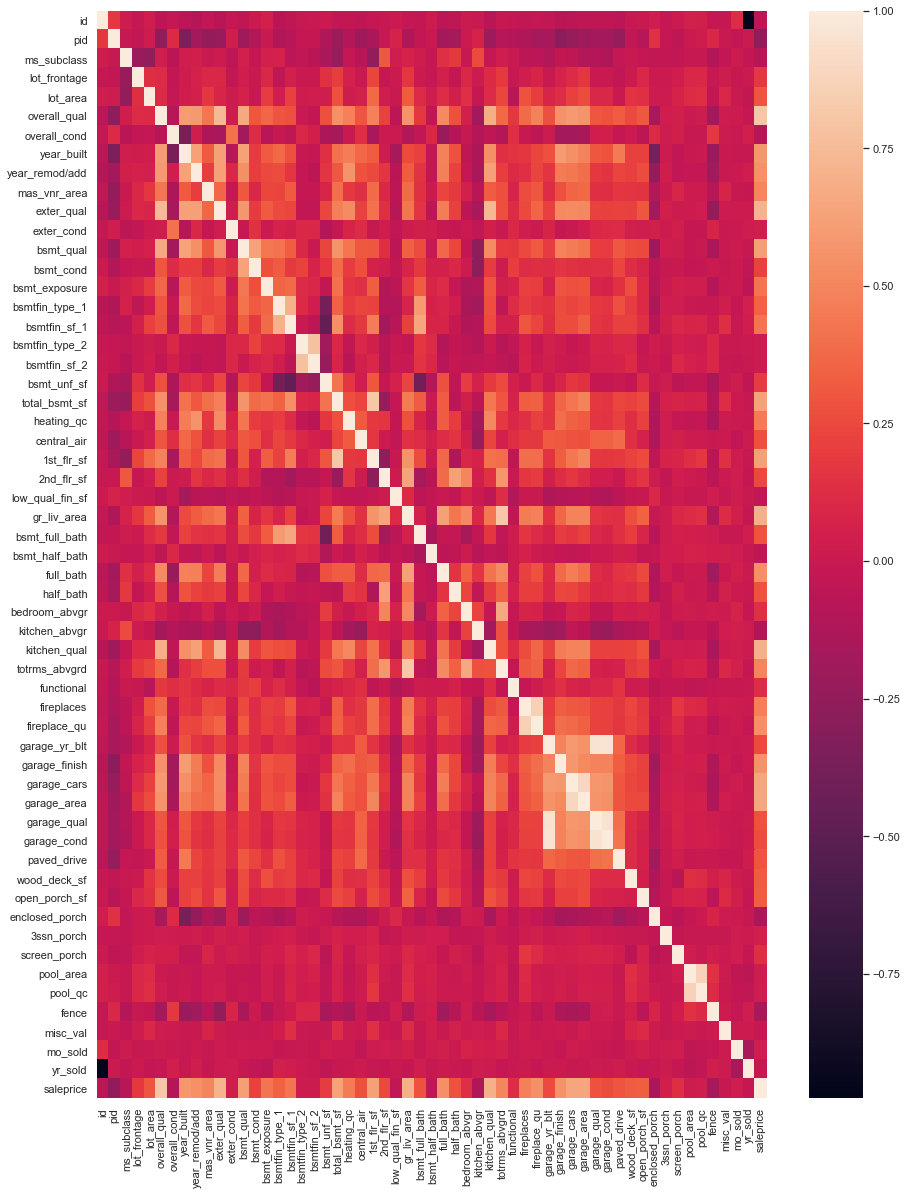

In [30]:
sns.set(rc = {'figure.figsize':(15,20)}, font_scale = 1)
sns.heatmap(df_train.corr(), annot = False);

There seem to be quite a number of variables that are strongly correlated with each other. We will handle some of the more important ones in our EDA. For now we will focus on cleaning the data up.

## Data Cleaning: Setting Dummy Variables
---  
There are a number of data that are strings that we cannot easily append a number to. Thus it will be better to set them to a dummy variable to better analyse them.

Note that the methodology for all the dummy variables is the same, in which the dummy variable is set using the get_dummies function into a relevant temporary DataFrame, in which the temporary DataFrame is concatenated into df_train, and the dummied column will then be removed from df_train. 

In [31]:
df_train.select_dtypes('object').columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating',
       'electrical', 'garage_type', 'misc_feature', 'sale_type'],
      dtype='object')

These are the columns that we will need to dummify as they are not ratings and cannot be set to a number easily. We will dummify them in the above order.

#### ms_zoning column:
Set ms_zoning to a dummy variable

In [32]:
mzon_pd = pd.get_dummies(df_train['ms_zoning'], dummy_na = False)
mzon_pd = mzon_pd.add_suffix('_mzon')
df_train = pd.concat([df_train, mzon_pd], axis = 1)
print("MS Zoning data has been concatenated.")
df_train.drop(columns = 'ms_zoning', inplace = True)

MS Zoning data has been concatenated.


#### Street column:  
Set Street Access Data with dummy columns:

In [33]:
strt_pd = pd.get_dummies(df_train['street'], dummy_na = False)
strt_pd = strt_pd.add_suffix('_strt')
df_train = pd.concat([df_train, strt_pd], axis = 1)
print("Street data has been concatenated.")
df_train.drop(columns = 'street', inplace = True)

Street data has been concatenated.


#### Alley Data  
For alley column, it is either Gravel or Paved. If none are present, there is no alley access. I will be creating a dummy column to address this with an integer instead.

In [34]:
alley_dum_pd = pd.get_dummies(df_train['alley'], dummy_na = False) #creating a dummy pd for alley column
df_train = pd.concat([df_train, alley_dum_pd], axis = 1) #concatenating by right join both dataframes
df_train.drop(columns = 'alley', inplace = True) #drop the dummied column

Alley String column is now cleared up into dummy variables.

#### lot_shape column
Set lot_shape to a dummy variable

In [35]:
ltsp_pd = pd.get_dummies(df_train['lot_shape'], dummy_na = False)
ltsp_pd = ltsp_pd.add_suffix('_ltsp')
df_train = pd.concat([df_train, ltsp_pd], axis = 1)
print("Lot Config data has been concatenated.")
df_train.drop(columns = 'lot_shape', inplace = True)

Lot Config data has been concatenated.


#### land_contour column
Set land_contour to a dummy variable

In [36]:
lndct_pd = pd.get_dummies(df_train['land_contour'], dummy_na = False)
lndct_pd = lndct_pd.add_suffix('_lndct')
df_train = pd.concat([df_train, lndct_pd], axis = 1)
print("Land Contour data has been concatenated.")
df_train.drop(columns = 'land_contour', inplace = True)

Land Contour data has been concatenated.


#### Utilities column:  
Set utilities with dummy columns:

In [37]:
util_pd = pd.get_dummies(df_train['utilities'], dummy_na = False)
util_pd = util_pd.add_suffix('_util')
df_train = pd.concat([df_train, util_pd], axis = 1)
print("Utilities data has been concatenated.")
df_train.drop(columns = 'utilities', inplace = True)

Utilities data has been concatenated.


#### lot_config column
Set lot_config to a dummy variable

In [38]:
ltcg_pd = pd.get_dummies(df_train['lot_config'], dummy_na = False)
ltcg_pd = ltcg_pd.add_suffix('_ltcg')
df_train = pd.concat([df_train, ltcg_pd], axis = 1)
print("Lot Config data has been concatenated.")
df_train.drop(columns = 'lot_config', inplace = True)

Lot Config data has been concatenated.


#### landslope column
Set landslope with dummy variables:

In [39]:
lslop_pd = pd.get_dummies(df_train['land_slope'], dummy_na = False) 
lslop_pd = lslop_pd.add_suffix('_lslop')
df_train = pd.concat([df_train, lslop_pd], axis = 1)
print("Land Slope data has been concatenated.")
df_train.drop(columns = 'land_slope', inplace = True)

Land Slope data has been concatenated.


#### neighborhood column
Set neighborhood to a dummy variable

In [40]:
ngbh_pd = pd.get_dummies(df_train['neighborhood'], dummy_na = False)
ngbh_pd = ngbh_pd.add_suffix('_ngbh')
df_train = pd.concat([df_train, ngbh_pd], axis = 1)
print("Neighborhood data has been concatenated.")
df_train.drop(columns = 'neighborhood', inplace = True)

Neighborhood data has been concatenated.


#### Condition 1 and Condition 2
Both condition columns are proximity to railroads and can thus be set to dummy columns.

In [41]:
con2_pd = pd.get_dummies(df_train['condition_2'], dummy_na = False)
con2_pd = con2_pd.add_suffix('_cond2')

In [42]:
df_train = pd.concat([df_train, con2_pd], axis = 1)
print("Condition 2 data has been concatenated.")

Condition 2 data has been concatenated.


In [43]:
df_train.drop(columns = 'condition_2', inplace = True)

In [44]:
con1_pd = pd.get_dummies(df_train['condition_1'], dummy_na = False)
con1_pd = con2_pd.add_suffix('_cond1')
con1_pd.head()

,Artery_cond2_cond1,Feedr_cond2_cond1,Norm_cond2_cond1,PosA_cond2_cond1,PosN_cond2_cond1,RRAe_cond2_cond1,RRAn_cond2_cond1,RRNn_cond2_cond1
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [45]:
df_train = pd.concat([df_train, con1_pd], axis = 1)
print("Condition 1 data has been concatenated.")
df_train.drop(columns = 'condition_1', inplace = True)

Condition 1 data has been concatenated.


Both Condition 1 and Condition 2 have been set up as dummy variables now.

#### bldg_type column:
Set bldg_type to a dummy variable

In [46]:
bdtp_pd = pd.get_dummies(df_train['bldg_type'], dummy_na = False)
bdtp_pd = bdtp_pd.add_suffix('_bdtp')
df_train = pd.concat([df_train, bdtp_pd], axis = 1)
print("Building Type data has been concatenated.")
df_train.drop(columns = 'bldg_type', inplace = True)

Building Type data has been concatenated.


#### house_style column
Set house_style to a dummy variable

In [47]:
hssty_pd = pd.get_dummies(df_train['house_style'], dummy_na = False)
hssty_pd = hssty_pd.add_suffix('_hssty')
df_train = pd.concat([df_train, hssty_pd], axis = 1)
print("House Style data has been concatenated.")
df_train.drop(columns = 'house_style', inplace = True)

House Style data has been concatenated.


#### roof_style column
Set roof_style to a dummy variable

In [48]:
rfst_pd = pd.get_dummies(df_train['roof_style'], dummy_na = False)
rfst_pd = rfst_pd.add_suffix('_rfst')
df_train = pd.concat([df_train, rfst_pd], axis = 1)
print("rf_st data has been concatenated.")
df_train.drop(columns = 'roof_style', inplace = True)

rf_st data has been concatenated.


#### roof_matl column:  
Set roof_matl with dummy columns:

In [49]:
rfmat_pd = pd.get_dummies(df_train['roof_matl'], dummy_na = False)
rfmat_pd = rfmat_pd.add_suffix('_rfmat')
df_train = pd.concat([df_train, rfmat_pd], axis = 1)
print("Roof Material data has been concatenated.")
df_train.drop(columns = 'roof_matl', inplace = True)

Roof Material data has been concatenated.


#### Exterior 1st and 2nd columns:  
Set exterior_1st and exterior_2nd to dummy columns:

In [50]:
ext1_pd = pd.get_dummies(df_train['exterior_1st'], dummy_na = False)
ext1_pd = ext1_pd.add_suffix('_ext1')
df_train = pd.concat([df_train, ext1_pd], axis = 1)
print("Exterior 1 data has been concatenated.")
df_train.drop(columns = 'exterior_1st', inplace = True)

Exterior 1 data has been concatenated.


In [51]:
ext2_pd = pd.get_dummies(df_train['exterior_2nd'], dummy_na = False)
ext2_pd = ext2_pd.add_suffix('_ext2')
df_train = pd.concat([df_train, ext2_pd], axis = 1)
print("Exterior 2 data has been concatenated.")
df_train.drop(columns = 'exterior_2nd', inplace = True)

Exterior 2 data has been concatenated.


#### mas_vnr_type column
Set mas_vnr_type to a dummy variable

In [52]:
mvt_pd = pd.get_dummies(df_train['mas_vnr_type'], dummy_na = False)
mvt_pd = mvt_pd.add_suffix('_mvt')
df_train = pd.concat([df_train, mvt_pd], axis = 1)
print("Mass Veneer Type data has been concatenated.")
df_train.drop(columns = 'mas_vnr_type', inplace = True)

Mass Veneer Type data has been concatenated.


#### foundation column:
Set foundation to a dummy variable

In [53]:
fndn_pd = pd.get_dummies(df_train['foundation'], dummy_na = False)
fndn_pd = fndn_pd.add_suffix('_fndn')
df_train = pd.concat([df_train, fndn_pd], axis = 1)
print("Foundation data has been concatenated.")
df_train.drop(columns = 'foundation', inplace = True)

Foundation data has been concatenated.


#### Heating column
Set heating with dummy variables:

In [54]:
heat_pd = pd.get_dummies(df_train['heating'], dummy_na = False)
heat_pd = heat_pd.add_suffix('_heat')
df_train = pd.concat([df_train, heat_pd], axis = 1)
print("Heating data has been concatenated.")
df_train.drop(columns = 'heating', inplace = True)

Heating data has been concatenated.


#### Electrical column
To deal with the electrical system column, I will be using dummy variables as there is a mixed category.

In [55]:
elec_pd = pd.get_dummies(df_train['electrical'], dummy_na = False)
elec_pd = elec_pd.add_suffix('_elec')
df_train = pd.concat([df_train, elec_pd], axis = 1)
print("Electrical data has been concatenated.")
df_train.drop(columns = 'electrical', inplace = True)
df_train.head()

Electrical data has been concatenated.


,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,GasA_heat,GasW_heat,Grav_heat,OthW_heat,Wall_heat,FuseA_elec,FuseF_elec,FuseP_elec,Mix_elec,SBrkr_elec
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,1


#### garage_type column
Set garage_type to a dummy variable

In [56]:
grgtp_pd = pd.get_dummies(df_train['garage_type'], dummy_na = False)
grgtp_pd = grgtp_pd.add_suffix('_grgtp')
df_train = pd.concat([df_train, grgtp_pd], axis = 1)
print("Garage Type data has been concatenated.")
df_train.drop(columns = 'garage_type', inplace = True)

Garage Type data has been concatenated.


#### misc_feature column:
Set misc_feature with dummy columns:

In [57]:
mscft_pd = pd.get_dummies(df_train['misc_feature'], dummy_na = False)
mscft_pd = mscft_pd.add_suffix('_mscft')
df_train = pd.concat([df_train, mscft_pd], axis = 1)
print("Misc Feature data has been concatenated.")
df_train.drop(columns = 'misc_feature', inplace = True)

Misc Feature data has been concatenated.


#### sale_type column
Set sale_type to a dummy variable

In [58]:
sltp_pd = pd.get_dummies(df_train['sale_type'], dummy_na = False)
sltp_pd = sltp_pd.add_suffix('_sltp')
df_train = pd.concat([df_train, sltp_pd], axis = 1)
print("Lot Config data has been concatenated.")
df_train.drop(columns = 'sale_type', inplace = True)

Lot Config data has been concatenated.


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 230 entries, id to WD _sltp
dtypes: float64(11), int64(46), uint8(173)
memory usage: 1.2 MB


With this, the data is cleaned up and ready to be explored and analysed. However, notice that our column names are messed up with capitalised names from the dummy variables. Let's fix that by rerunning the column cleaner again.

In [60]:
df_train.columns = df_train.columns.str.lower()
df_train.columns = df_train.columns.str.replace(' ','_')
df_train.tail()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,tenc_mscft,cod_sltp,cwd_sltp,con_sltp,conld_sltp,conli_sltp,conlw_sltp,new_sltp,oth_sltp,wd__sltp
2046,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
2047,785,905377130,30,0.0,12342,4,5,1940,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
2048,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
2049,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,...,0,0,0,0,0,0,0,0,0,1
2050,10,527162130,60,60.0,7500,7,5,1999,1999,0.0,...,0,0,0,0,0,0,0,0,0,1


## Data cleaning: ID and PID Columns
---

From the data dictionary, we find that ID and the PID are just indexes of their respective houses. These are not needed in our data and thus will be dropped.

In [61]:
df_train.drop(['id','pid'], axis = 1, inplace = True)
df_train.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,...,tenc_mscft,cod_sltp,cwd_sltp,con_sltp,conld_sltp,conli_sltp,conlw_sltp,new_sltp,oth_sltp,wd__sltp
0,60,0.0,13517,6,8,1976,2005,289.0,4,3,...,0,0,0,0,0,0,0,0,0,1
1,60,43.0,11492,7,5,1996,1997,132.0,4,3,...,0,0,0,0,0,0,0,0,0,1
2,20,68.0,7922,5,7,1953,2007,0.0,3,4,...,0,0,0,0,0,0,0,0,0,1
3,60,73.0,9802,5,5,2006,2007,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1
4,50,82.0,14235,6,8,1900,1993,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1


Let's save the csv into our data folder for our EDA notebook's reference.

In [62]:
df_train.to_csv('datasets/clean_train.csv')